In [1]:
import os
print(os.listdir())

['.ipynb_checkpoints', 'Iris.csv', 'IrisClassification.ipynb']


In [2]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#load dataset using pandas

df = pd.read_csv('Iris.csv')

In [4]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


# EDA

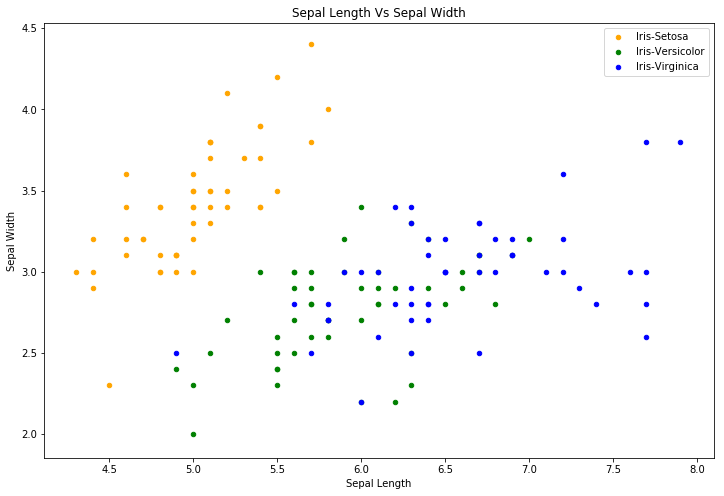

In [6]:
fig = df[df.Species == 'Iris-setosa'].plot(kind ='scatter',x ='SepalLengthCm',y ='SepalWidthCm',color ='orange',label='Iris-Setosa')
fig = df[df.Species == 'Iris-versicolor'].plot(kind ='scatter',x ='SepalLengthCm',y ='SepalWidthCm',color ='green',label='Iris-Versicolor',ax=fig)
fig = df[df.Species == 'Iris-virginica'].plot(kind ='scatter',x ='SepalLengthCm',y ='SepalWidthCm',color ='blue',label='Iris-Virginica',ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length Vs Sepal Width')

fig =plt.gcf()
fig.set_size_inches(12,8)

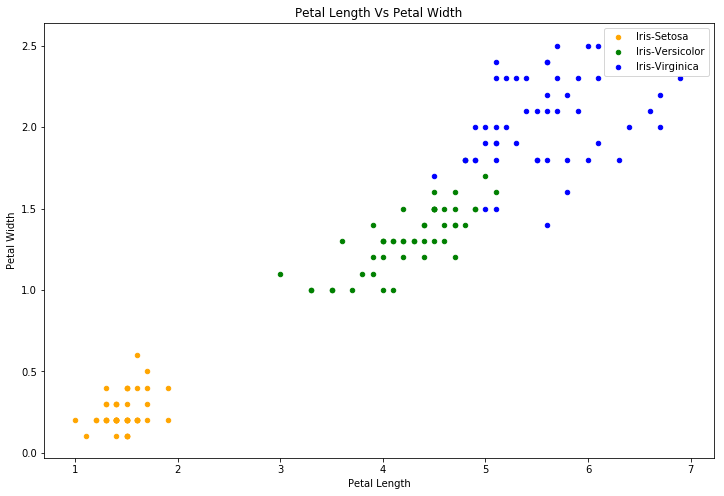

In [7]:
fig = df[df.Species == 'Iris-setosa'].plot(kind ='scatter',x ='PetalLengthCm',y ='PetalWidthCm',color ='orange',label='Iris-Setosa')
fig = df[df.Species == 'Iris-versicolor'].plot(kind ='scatter',x ='PetalLengthCm',y ='PetalWidthCm',color ='green',label='Iris-Versicolor',ax=fig)
fig = df[df.Species == 'Iris-virginica'].plot(kind ='scatter',x ='PetalLengthCm',y ='PetalWidthCm',color ='blue',label='Iris-Virginica',ax=fig)

fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length Vs Petal Width')

fig =plt.gcf()
fig.set_size_inches(12,8)

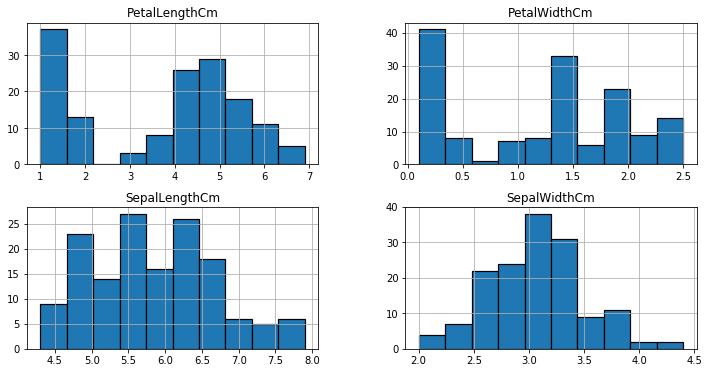

In [8]:
df.iloc[:,1:].hist(edgecolor ='black', linewidth ='1.2')
fig = plt.gcf()
fig.set_size_inches(12,6)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [10]:
#independent variable
X = df.iloc[ : , 1:5].values

In [11]:
X.shape

(150, 4)

In [12]:
#dependent variable
y = df.iloc[ : , 5].values

In [13]:
y.shape

(150,)

In [14]:
#splitting dataset in train and test
X_train ,X_test ,y_train ,y_test = train_test_split(X ,y ,test_size = 0.2)

# Classification

## Here we are going use different classification algorithms to check accuracy of different models

# Support Vector Machine

In [16]:
from sklearn import svm
classifier = svm.SVC()
classifier.fit(X_train,y_train)
prediction = classifier.predict(X_test)
print("The Accuracy of SVM is",accuracy_score(y_test,prediction))

The Accuracy of SVM is 1.0


c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### Accuray is quite good in SVM

# KNeighborsClassifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train,y_train)
prediction = classifier.predict(X_test)
print("The Accuracy of KNeighborsClassifier is",accuracy_score(y_test,prediction))

The Accuracy of KNeighborsClassifier is 0.9666666666666667


#### To know more we are going to see accuracy over different values of K.

([<matplotlib.axis.XTick at 0x24018c2cc18>,
 <a list of 10 Text xticklabel objects>)

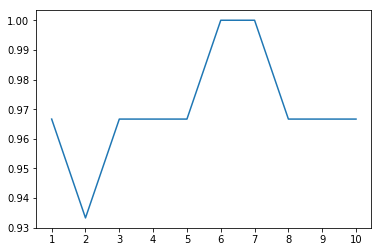

In [19]:
a_index = list(range(1, 11))
a = pd.Series()
for i in list(range(1, 11)):
    classifier = KNeighborsClassifier(n_neighbors = i)
    classifier.fit(X_train, y_train)
    prediction = classifier.predict(X_test)
    a = a.append(pd.Series(accuracy_score(prediction, y_test)))
plt.plot(a_index, a)
x = [1,2,3,4,5,6,7,8,9,10]
plt.xticks(x)

# DecisionTreeClassifier

In [20]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)
prediction = classifier.predict(X_test)
print("The Accuracy of DecisionTreeClassifier is",accuracy_score(y_test,prediction))

The Accuracy of DecisionTreeClassifier is 0.9666666666666667


### Exploring features separately

In [22]:
petal = df[['PetalLengthCm','PetalWidthCm','Species']]
sepal = df[['SepalLengthCm','SepalWidthCm','Species']]

### Petal Data

In [30]:
petal_x = df[['PetalLengthCm','PetalWidthCm']]
petal_y = df['Species']

petal_x_train ,petal_x_test ,petal_y_train ,petal_y_test = train_test_split(petal_x,petal_y,test_size = 0.2) 

### Sepal Data

In [31]:
sepal_x = df[['SepalLengthCm','SepalWidthCm']]
sepal_y = df['Species']

sepal_x_train ,sepal_x_test ,sepal_y_train ,sepal_y_test = train_test_split(sepal_x,sepal_y,test_size = 0.2) 

# SVM 

In [33]:
#petal
classifier = svm.SVC()
classifier.fit(petal_x_train,petal_y_train)
prediction = classifier.predict(petal_x_test)
print("The Accuracy of SVM for petal",accuracy_score(petal_y_test,prediction))

#sepal
classifier = svm.SVC()
classifier.fit(sepal_x_train,sepal_y_train)
prediction = classifier.predict(sepal_x_test)
print("The Accuracy of SVM for sepal",accuracy_score(sepal_y_test,prediction))

The Accuracy of SVM for petal 0.9666666666666667
The Accuracy of SVM for sepal 0.9


c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## DecisionTreeClassifier

In [37]:
#petal
classifier = DecisionTreeClassifier()
classifier.fit(petal_x_train,petal_y_train)
prediction = classifier.predict(petal_x_test)
print("The Accuracy of DecisionTree Classifier for petal",accuracy_score(petal_y_test,prediction))

#sepal
classifier = DecisionTreeClassifier()
classifier.fit(sepal_x_train,sepal_y_train)
prediction = classifier.predict(sepal_x_test)
print("The Accuracy of DecisionTree Classifier for sepal",accuracy_score(sepal_y_test,prediction))


The Accuracy of DecisionTree Classifier for petal 0.9333333333333333
The Accuracy of DecisionTree Classifier for sepal 0.7333333333333333


## KNeighborsClassifier

In [39]:
#petal
classifier = KNeighborsClassifier()
classifier.fit(petal_x_train,petal_y_train)
prediction = classifier.predict(petal_x_test)
print("The Accuracy of KNeighborsClassifier for petal",accuracy_score(petal_y_test,prediction))

#sepal
classifier = KNeighborsClassifier()
classifier.fit(sepal_x_train,sepal_y_train)
prediction = classifier.predict(sepal_x_test)
print("The Accuracy of KNeighborsClassifier for sepal",accuracy_score(sepal_y_test,prediction))

The Accuracy of KNeighborsClassifier for petal 0.9666666666666667
The Accuracy of KNeighborsClassifier for sepal 0.8333333333333334


## Conclusion :

In [ ]:
1.We can observe that Support Vector Machine(SVM) has more accuracy as compared to K-NN and Decision Tree classifier.
2.When we separately find out accuracy for features i.e Sepal and Petal,we can observe that accuracy with Sepal length and width is high compared to Petal Length and Width.